# Exploratory Data Analisys

### Imports

In [9]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sbn   
import scipy.stats as ss

### Load dataset

In [10]:
try:
    df = pd.read_csv('../../resources/dataset/http_ton.csv')
    print('Dataset loaded')
except FileNotFoundError:
    print('File not found. Remember to place the dataset in resources/dataset')

Dataset loaded


### Dataset Shape

In [11]:
print(f"Number of rows: {df.shape[0]}")
print(f"Number of columns: {df.shape[1]}")

print(df.head().T)


#print("\nDataset infos:") 
#print(df.info())

Number of rows: 3440744
Number of columns: 26
                                    0  \
Unnamed: 0                          0   
src_ip                  192.168.1.195   
src_port                        50058   
dst_ip                    192.168.1.1   
dst_port                        41952   
proto                             tcp   
duration                     0.803513   
src_bytes                         383   
dst_bytes                        3882   
conn_state                         SF   
missed_bytes                        0   
src_pkts                           10   
src_ip_bytes                      795   
dst_pkts                           12   
dst_ip_bytes                     4374   
http_method                   missing   
http_uri                      missing   
http_referrer                 missing   
http_request_body_len               0   
http_response_body_len              0   
http_status_code                    0   
http_user_agent               missing   
http_orig_m

In [12]:
attack_category = df['type']

print('Attack Categories:')
print(attack_category.unique())
print('Number of attacks')
print((df['label'] == 1).sum())

Attack Categories:
['normal' 'scanning' 'dos' 'injection' 'ddos' 'password' 'xss' 'mitm']
Number of attacks
3379433


### Missing values

In [13]:
print("\nMissing values per column:")
print((df == 'missing').sum())


Missing values per column:
Unnamed: 0                      0
src_ip                          0
src_port                        0
dst_ip                          0
dst_port                        0
proto                           0
duration                        0
src_bytes                       0
dst_bytes                       0
conn_state                      0
missed_bytes                    0
src_pkts                        0
src_ip_bytes                    0
dst_pkts                        0
dst_ip_bytes                    0
http_method               3416434
http_uri                  3416434
http_referrer             3440737
http_request_body_len           0
http_response_body_len          0
http_status_code                0
http_user_agent           3416440
http_orig_mime_types      3439033
http_resp_mime_types      3434524
label                           0
type                            0
dtype: int64


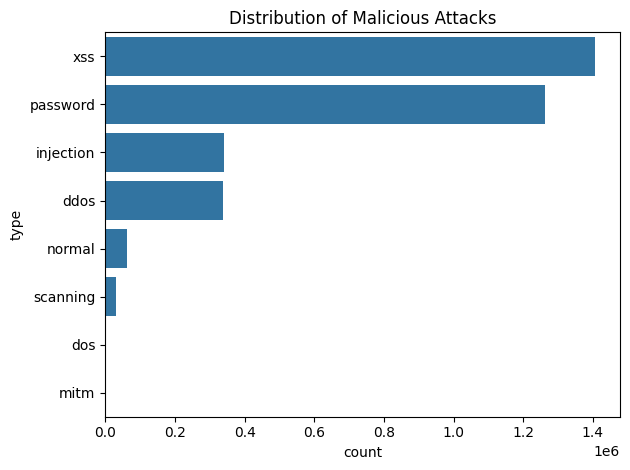

In [14]:
plt.figure()
sbn.countplot(y='type', data=df, order = attack_category.value_counts().index)
plt.title('Distribution of Malicious Attacks')
plt.tight_layout()
plt.show()

In [15]:
print("Distribution of targer variable (label):")
print(df['label'].value_counts(normalize=True) * 100)

Distribution of targer variable (label):
label
1    98.218089
0     1.781911
Name: proportion, dtype: float64


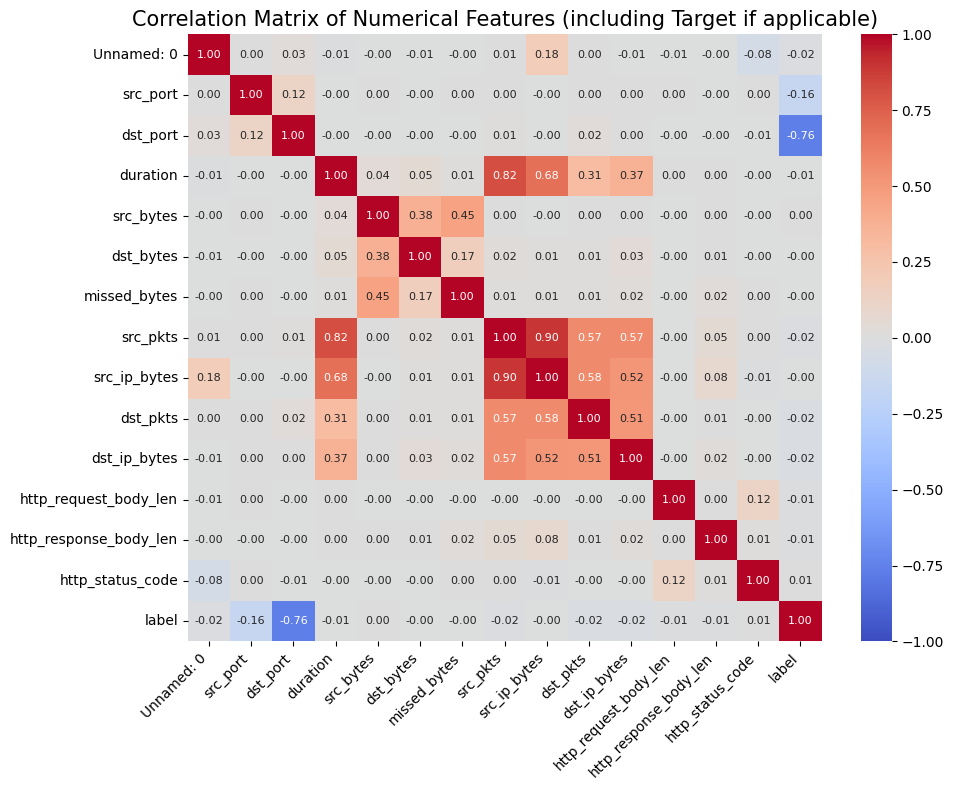

In [16]:
numerical_features = df.select_dtypes(include=np.number).columns.to_list()
correlation_matrix = df[numerical_features].corr() #Pearson by default

plt.figure(figsize=(max(10, len(numerical_features)*0.5), max(8, len(numerical_features)*0.4))) 
sbn.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", annot_kws={"size": 8}, vmin=-1, vmax=1)
plt.title('Correlation Matrix of Numerical Features (including Target if applicable)', fontsize=15)
plt.xticks(rotation=45, ha='right')
plt.yticks(rotation=0)
plt.tight_layout() 
plt.show()

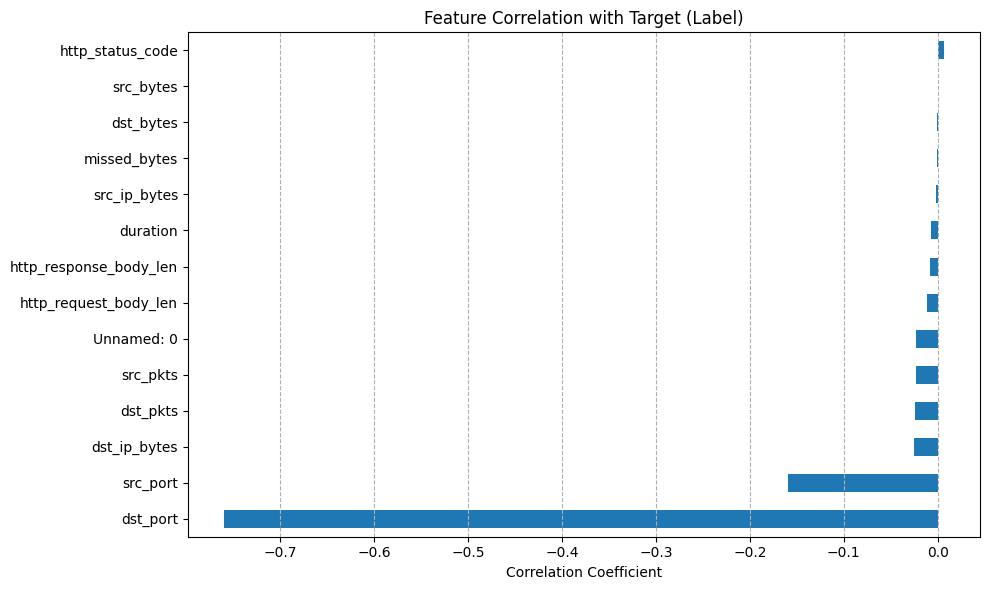

In [17]:
target_correlations = correlation_matrix['label'].drop('label').sort_values()
plt.figure(figsize=(10, max(6, len(target_correlations) * 0.3)))
target_correlations.plot(kind='barh')
plt.title('Feature Correlation with Target (Label)')
plt.xlabel('Correlation Coefficient')
plt.grid(axis='x', linestyle='--')
plt.tight_layout()
plt.show()